## Estimating Land Parcel Area using Monte Carlo Simulation (Goucher Campus)

Name: Mishuk

Purpose: In real estate or environmental assessment, it's often necessary to estimate the area of irregularly shaped land parcels. Traditional methods may be time-consuming or impractical. Monte Carlo simulation offers could be an alternative approach to estimate the area efficiently.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In my project I choose a complex irregular polygon shape Goucher Campus to esitimates it's area by using Monte-Carlo Simulation. For tools, I have used PlotDigitizer (https://www.PlotDigitizer.com/app) to plot Goucher College land acre area which I defind x1 to x2 is 30 units, as well y1 to y2 30 units, I took small area of graph for smooth calculation. Later which I will compare with actual area of Goucher College by using calcmaps(https://www.calcmaps.com/map-distance/).

Here is my collocted dataset

<img src="Screenshot 2024-05-11 at 5.24.21 PM.png" style="width: 100%;">

In [2]:
#Define boundary points for Goucher 287 Acre irregular shape
BoundaryPoints = np.array([
    [11.175874391155025, 4.785471290535384],
    [18.36143238562981, 1.9162063925286834],
    [26.00898860786619, 5.098824198993649],
    [28.10909111969559, 14.621066111319509],
    [28.0797275617822, 25.558925868915647],
    [27.1098614063233, 26.1703035869045],
    [26.063024504381367, 26.698637933487692],
    [25.07752095121711, 27.136167845917033],
    [24.00896544135107, 27.51781810655939],
    [23.022766892733245, 27.89073717161003],
    [22.02353717936095, 28.139091179552185],
    [20.993032670577946, 28.35640093650157],
    [19.95453571407887, 28.55256179746213],
    [18.796499539565513, 28.698857830265556],
    [17.74306018081465, 28.757841907151818],
    [16.47886345076826, 28.672276190352996],
    [15.16480079692812, 28.581471756199146],
    [13.878190463504051, 28.33699827963109],
    [12.572294006243375, 28.075256438448303],
    [11.457173800988052, 27.761321450283923],
    [10.363598454793442, 27.414401945439728],
    [9.30842160740865, 27.06709438745812],
    [8.331605497414037, 26.621415359143178],
    [7.505082154254241, 26.180392968477147],
    [3.7001557948141754, 22.61263242313314],
    [3.076397375233837, 21.87940601999767],
    [2.6731262632990274, 21.049748412215912],
    [2.4208429136526064, 19.974841221591277],
    [1.7086463226053064, 13.769289474705403],
    [5.385693518588233, 12.718441578600162],
    [6.804005490464083, 11.844157860016297],
    [8.378170192803323, 10.71550530986043],
    [12.63345360615766, 7.158028172657776],
    [11.175874391155025, 4.785471290535384]])

Drawing a plot before the simulation to see I got a good accurate shape as Goucher original campus area.

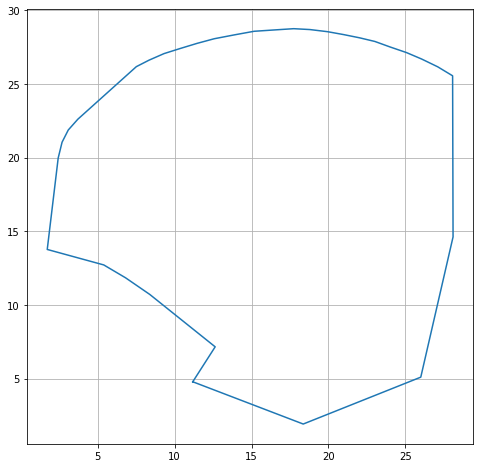

In [15]:
plt.figure(figsize=(8,8))
plt.plot(BoundaryPoints[:, 0], BoundaryPoints[:, 1])
plt.grid(True)
plt.show()

Create a rectangle area all around the campus boundary, so the rectangle will completely enclose the irregular shape. This bounding rectangle serves as a frame of reference for the irregular shape, will make it easier to perform calculations and analyses.

In [16]:
#Rectangle encompasses the entire bpundary 30*30= 900 units
Rectangle = [0, 30,0, 30]

In [27]:
np.random.seed(0)

#Number of random points to generate
NumPoints = 7000

#Generating random points
RandomDots = np.random.uniform(0, 30, (NumPoints, 2)) # 2 indicates that each point has two coordinates (x and y)

In [28]:
def func(dots, vertices):
    x, y = dots
    n = len(vertices)        #total number of vertices of the arealine, which is 34
    inside = False           #initially all the dots will consider outside of the boundary.
    
    p1x, p1y = vertices[0]
    
    for i in range(n + 1):
        p2x, p2y = vertices[i % n]
        
        if (y>min(p1y,p2y)) and (y<=max(p1y,p2y)) and (x<=max(p1x,p2x)) and ((p1y!=p2y) and (p1x==p2x or x<=(y-p1y)*(p2x-p1x)/(p2y-p1y)+p1x)):
            inside = 1-inside

        p1x, p1y = p2x, p2y
    return inside

In [29]:
integral = []                #Initialize an empty list to store points inside the boundary

for dots in RandomDots:
    if func(dots, BoundaryPoints):
        integral.append(dots)

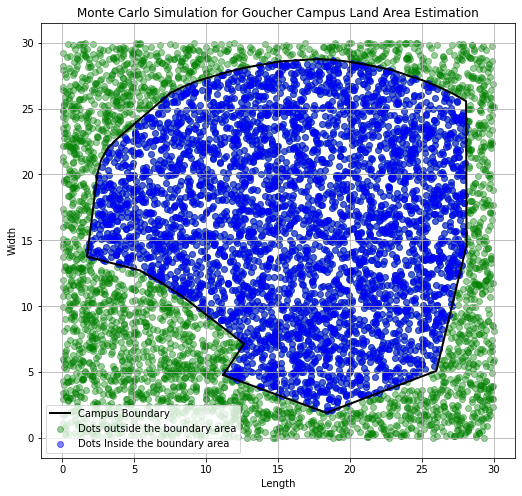

In [30]:
plt.figure(figsize=(8.5,8))
plt.plot(BoundaryPoints[:,0],BoundaryPoints[:,1],color='black',linewidth=2,label='Campus Boundary')
plt.scatter(RandomDots[:,0],RandomDots[:,1],color='green',alpha=0.4,label='Dots outside the boundary area')
plt.scatter(np.array(integral)[:,0],np.array(integral)[:,1],color='blue',alpha=0.5,label='Dots Inside the boundary area')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Monte Carlo Simulation for Goucher Campus Land Area Estimation')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
ratio =len(integral)/NumPoints  #Calculate the ratio of dots inside the boundary to the total number of dots

EstimatedArea = ratio*((Rectangle[1]-Rectangle[0])*(Rectangle[3]-Rectangle[2]))  #estimating area based on 30*30 plot graph
print("Estimated Area:", EstimatedArea)

Estimated Area: 517.3714285714285


Here is a thing, The Estimated area 513.9 units we got its not the actual area estimation rather it is the area based on the graph we use which was 30 * 30= 900 units. Now we will compare it with real size of Goucher Campus.

I compared the actual real mesurement of Goucher Campus from calcmap (www.calcmap.com). As you can see our x-axis (x1,x2) distance is 1.50km and y-axis (y1,y2) distance is 1.35km long in real according to the map, we can still compare these distances with 30 units we use earlier in our Goucher Capus shape plot. 

<img src="A.png" style="width: 100%;">

So now lets calculate the real area of that Rectangle around the campus and findout the the real Goucher boundary area by esmating real measurement. 

In [42]:
RealRectangleArea = 1.35*1.5
print(RealRectangleArea,"km")

2.0250000000000004 km


In [44]:
RealBoundaryArea = (RealRectangleArea * EstimatedArea)/900  #estimating area based on 1.50*1.35 real measurement
print(RealBoundaryArea,"square km")

1.1640857142857142 square km


We got the estimated Goucher Land area is 1.1640 square km.

Now its time to check how accurate it is with the actual area of Goucher Campus. According to Goucher website, Gocuher is 287 acres or 1.16145 square km of land area. 

In [49]:
#Calculate the error and error rate
error = abs(1.1640 - RealBoundaryArea)
errorRate = (error / 1.1640) * 100

print("Real area of Goucher College:", 1.1640, "square km")
print("Estimated area of Goucher College:", RealBoundaryArea, "square km")
print("Error:", error, "square km")
print("Error rate:", errorRate, "%")

Real area of Goucher College: 1.164 square km
Estimated area of Goucher College: 1.1640857142857142 square km
Error: 8.571428571424455e-05 square km
Error rate: 0.007363770250364652 %


### Summary
According to our estimation on Goucher College campus, Monte Carlo simulation is highly accurate in estimating the area of the land parcel. The real area is very close to the estimated area, with an error of only 8.57*10^-5 square km, leading to a very low error rate of approximately 0.00736%. This level of accuracy suggests that the Monte Carlo method is effective for this type of area estimation problem, assuming the number of simulation runs is sufficiently high to produce reliable results.